<a href="https://colab.research.google.com/github/Priti0427/Dog-vs-cat-classifier/blob/main/Cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [3]:
# To unzip the uploaded file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
# import all necessary Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout


In [5]:
#generators - divide the whole data into batches(so that ram is free), used to process large amount of data
# refer keras documentation
# copy path of train data in directory
# label_mode ='int' means cats - 0 and dogs - 1
# image_size = (256,256) ensures that the size of all images are same(as in dataset, different size images are there)
# we will get dataset object here(train_ds)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# we will get image as numpy array with values from 0 to 255. we need pixel values from 0 to 1. so, Normalization
# we are creating here a function 'process' with parameters image and label
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [7]:
# create CNN model
# 3 convolution layer - first has 32 filters, 2nd has 64 filters , 3rd layer 128 filters
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu' )) # input_shape will be inferred on its own
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) # 128 is number of neurons
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [8]:
# for getting model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
#loss = 'binary_crossentropy' as this is classification problem
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [10]:
# Now, we will run the model
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 64s 91ms/step - loss: 0.6114 - accuracy: 0.6600 - val_loss: 0.5296 - val_accuracy: 0.7402
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4703 - accuracy: 0.7717 - val_loss: 0.4626 - val_accuracy: 0.7940
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3665 - accuracy: 0.8300 - val_loss: 0.4839 - val_accuracy: 0.7932
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2403 - accuracy: 0.8993 - val_loss: 0.5835 - val_accuracy: 0.7818
Epoch 5/10
625/625 [==============================] - 84s 133ms/step - loss: 0.1367 - accuracy: 0.9462 - val_loss: 0.7343 - val_accuracy: 0.7708
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0818 - accuracy: 0.9693 - val_loss: 0.8761 - val_accuracy: 0.7672
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0632 - accuracy: 0.9761 - val_loss: 1.1536 - val_accur

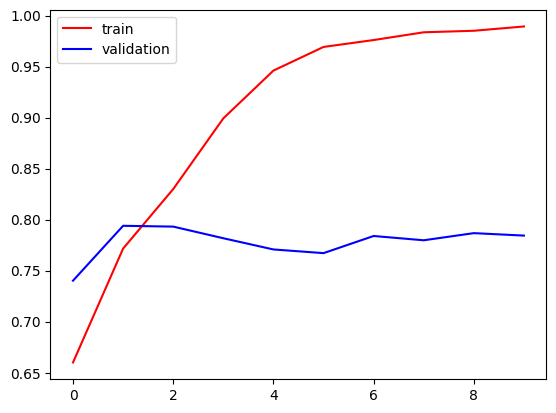

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

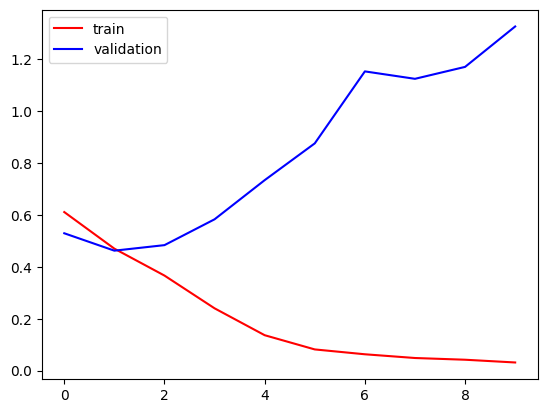

In [12]:
plt.plot(history.history['loss'], color = 'red' , label = 'train')
plt.plot(history.history['val_loss'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce Overfitting

# Add more data
#Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Normalization
# Reduce Complexity


In [15]:
# create new CNN model
# 3 convolution layer - first has 32 filters, 2nd has 64 filters , 3rd layer 128 filters
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu' )) # input_shape will be inferred on its own
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) # 128 is number of neurons
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [16]:
# for getting model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
#loss = 'binary_crossentropy' as this is classification problem
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])


In [18]:
# Now, we will run the model
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)
#accuracy improved to 83%

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.2914 - accuracy: 0.5572 - val_loss: 0.6555 - val_accuracy: 0.5870
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6274 - accuracy: 0.6320 - val_loss: 0.5834 - val_accuracy: 0.6924
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5647 - accuracy: 0.6926 - val_loss: 0.6043 - val_accuracy: 0.6820
Epoch 4/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4903 - accuracy: 0.7447 - val_loss: 0.5652 - val_accuracy: 0.6738
Epoch 5/10
625/625 [==============================] - 73s 115ms/step - loss: 0.4379 - accuracy: 0.7748 - val_loss: 0.4692 - val_accuracy: 0.7774
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3750 - accuracy: 0.8044 - val_loss: 0.4606 - val_accuracy: 0.7826
Epoch 7/10
625/625 [==============================] - 84s 133ms/step - loss: 0.3278 - accuracy: 0.8265 - val_loss: 0.4171 - val_ac

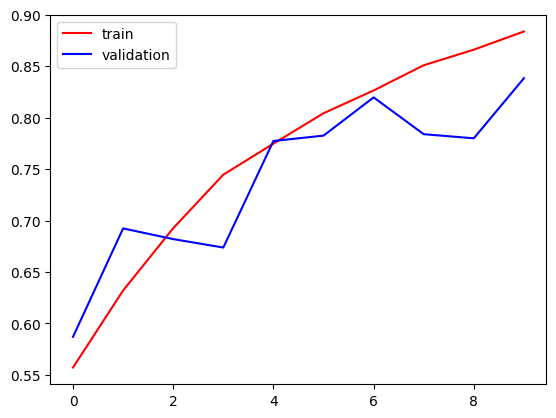

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

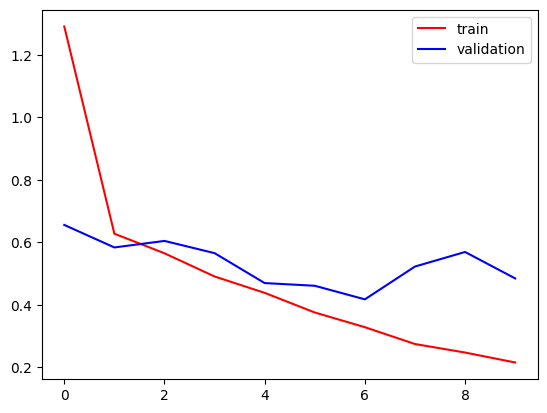

In [20]:
plt.plot(history.history['loss'], color = 'red' , label = 'train')
plt.plot(history.history['val_loss'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Now, we are testing our model on unseen dataset.

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/Cat.jpg')
# test_img has an numpy array of image

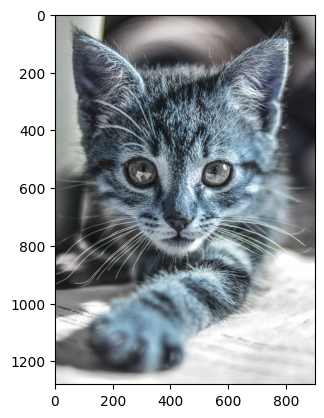

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape
#shape of test image is large, so, we need to resize it

(1280, 900, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))


In [26]:
test_input = test_img.reshape((1,256,256,3))
# as we pass data in batches and here we have only one image in a batch. this means this batch has one image with (256,256,3) dimension

In [27]:
model.predict(test_input)
# 1. dog
# 0. cat

1/1 [==============================] - 0s 384ms/step


array([[0.]], dtype=float32)

In [28]:
import cv2

In [29]:
test_img = cv2.imread('/content/dog.jpg')
# test_img has an numpy array of image

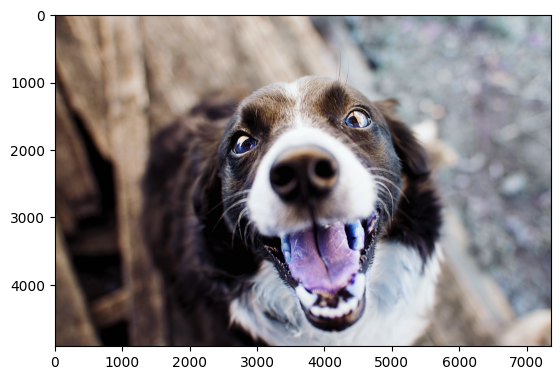

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape
#shape of test image is large, so, we need to resize it

(4912, 7360, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

In [33]:
test_input = test_img.reshape((1,256,256,3))
# as we pass data in batches and here we have only one image in a batch. this means this batch has one image with (256,256,3) dimension

In [34]:
model.predict(test_input)
# 1. dog
# 0. cat

1/1 [==============================] - 0s 18ms/step


array([[0.48441294]], dtype=float32)